In [35]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [36]:
class NadarayaWatsonKernelRegression:
    def __init__(self, kernel='gaussian', bandwidth=1.0):
        self.kernel = kernel
        self.bandwidth = bandwidth

    def _kernel_function(self, distances):
        """Kernel function, default is Gaussian."""
        if self.kernel == 'gaussian':
            return np.exp(-0.5 * (distances / self.bandwidth) ** 2)
        else:
            raise ValueError(f"Unsupported kernel: {self.kernel}")

    def fit(self, X_train, y_train):
        """Fit the model with training data."""
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        """Predict the target values for the test data."""
        # Compute pairwise distances between test and training points
        distances = cdist(X_test, self.X_train, 'euclidean')
        
        # Apply kernel function
        weights = self._kernel_function(distances)
        
        # Normalize weights
        weights_sum = np.sum(weights, axis=1, keepdims=True)
        weights /= weights_sum
        
        # Weighted sum of the target values
        return np.dot(weights, self.y_train)

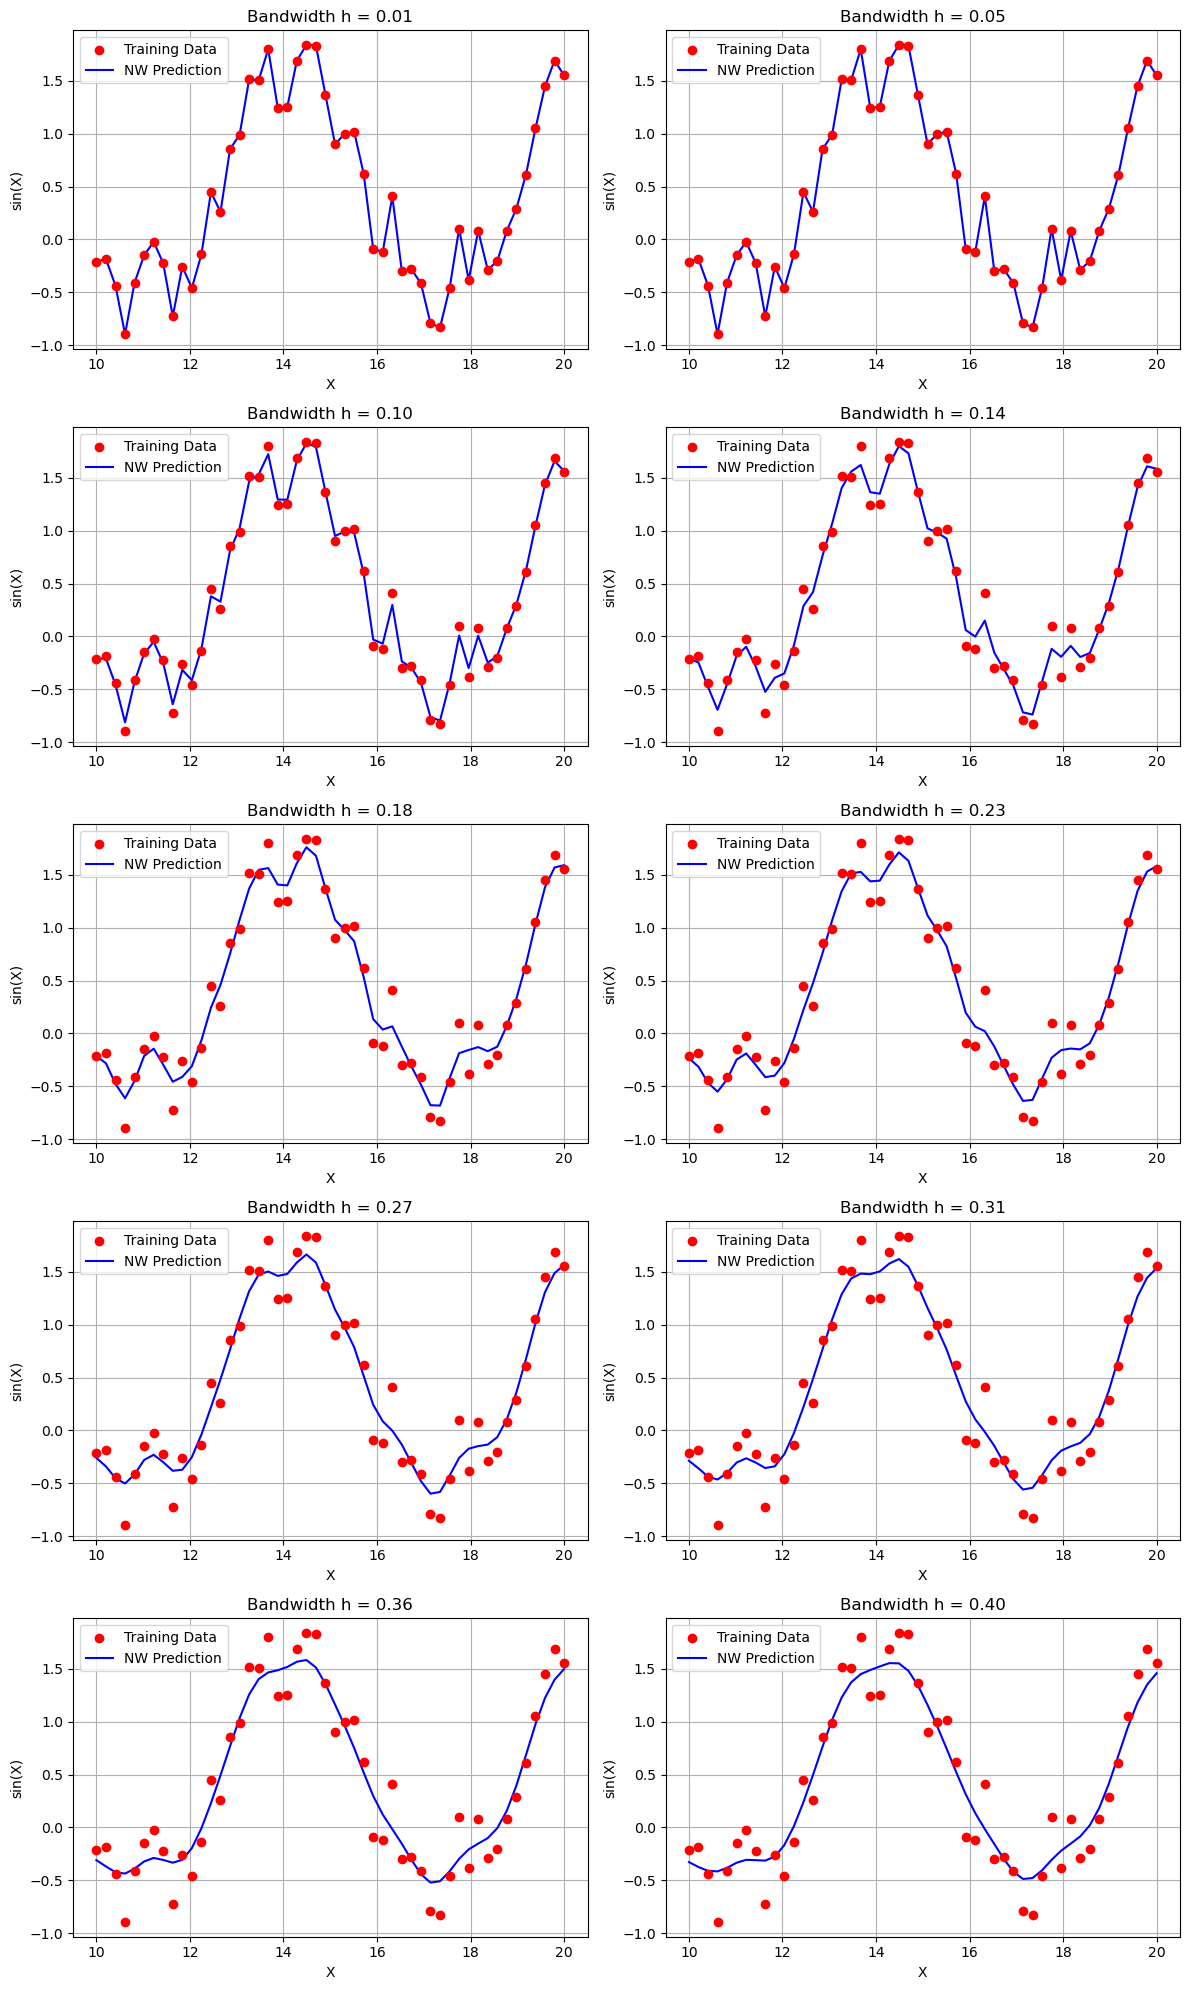

In [40]:
# Generate new training data
X_train = np.linspace(10, 20, 50)
y_train = np.sin(X_train)+ 1e-0*np.random.rand(50)

# Reshape X_train to be compatible with the Nadaraya-Watson code (n, d)
X_train = X_train.reshape(-1, 1)

h_values = np.linspace(0.01, 0.4, 10)  # Define h values
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))  # 5 rows and 2 columns

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Initialize and fit the model with the new training data
for idx, h in enumerate(h_values):
    nwkr = NadarayaWatsonKernelRegression(kernel='gaussian', bandwidth=h)
    nwkr.fit(X_train, y_train)

    # Predict the values
    y_pred = nwkr.predict(X_train)

    # Plot on the current subplot
    axes[idx].scatter(X_train, y_train, color='red', label='Training Data', zorder=3)
    axes[idx].plot(X_train, y_pred, color='blue', label='NW Prediction', zorder=2)
    axes[idx].set_title(f'Bandwidth h = {h:.2f}')
    axes[idx].set_xlabel('X')
    axes[idx].set_ylabel('sin(X)')
    axes[idx].legend()
    axes[idx].grid(True)

# Adjust layout so plots don't overlap
plt.tight_layout()
plt.show()